In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
data['Seller_Type'] = data['Seller_Type'].map({'Individual':0,'Dealer':1})
data['Transmission'] = data['Transmission'].map({'Manual':0,'Automatic':1})
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0,'Diesel':1})
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0.0,1,0,0
1,sx4,2013,4.75,9.54,43000,1.0,1,0,0
2,ciaz,2017,7.25,9.85,6900,0.0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0.0,1,0,0
4,swift,2014,4.60,6.87,42450,1.0,1,0,0


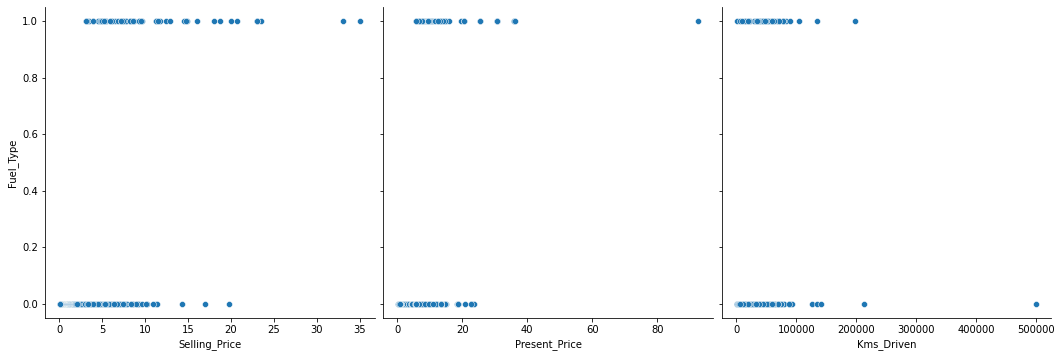

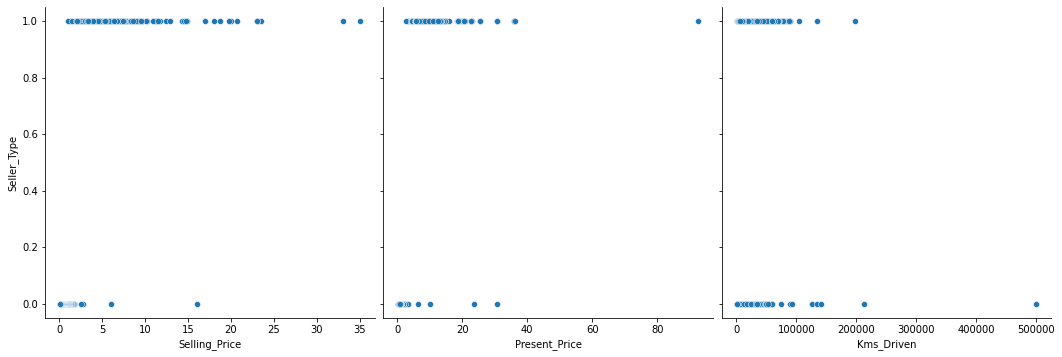

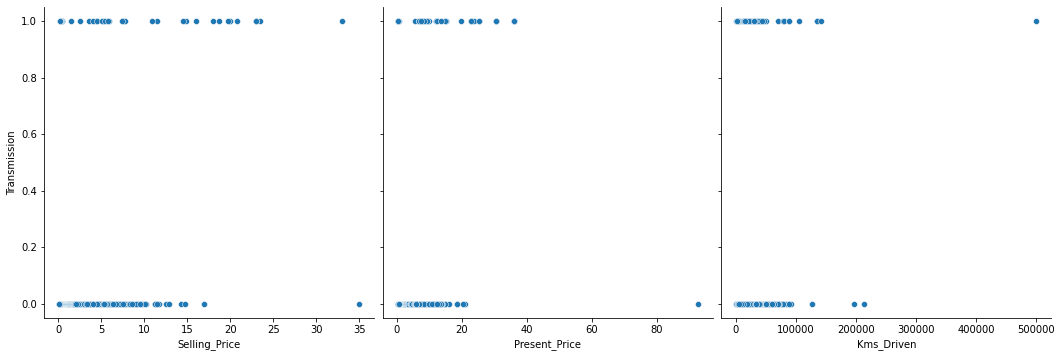

In [33]:
import seaborn as sns
sns.pairplot(data,x_vars=['Selling_Price','Present_Price','Kms_Driven'],y_vars='Fuel_Type',height=5)
sns.pairplot(data, x_vars=['Selling_Price', 'Present_Price','Kms_Driven'], y_vars='Seller_Type', height=5)
sns.pairplot(data, x_vars=['Selling_Price', 'Present_Price','Kms_Driven'], y_vars='Transmission', height=5)

In [34]:
x = data.drop(['Car_Name', 'Year', 'Fuel_Type', 'Seller_Type','Transmission','Owner'],axis=1)
x.head()

,Selling_Price,Present_Price,Kms_Driven
0,3.35,5.59,27000
1,4.75,9.54,43000
2,7.25,9.85,6900
3,2.85,4.15,5200
4,4.60,6.87,42450


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [36]:
y = data['Seller_Type']
print(y.shape)

y = data['Seller_Type'].values.reshape(-1,1)
print(y.shape)

(301,)
(301, 1)


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print(f"The various coefficients of the model are :- {reg.coef_}")
print(f"The intercept of the model are :- {reg.intercept_}")
print(f"The equation of the model is :- {reg.coef_[0][0]:.3}*y1 + {reg.coef_[0][1]:.3}*y2 + {reg.coef_[0][2]:.3}*y3 + {reg.intercept_[0]:.3}")


The various coefficients of the model are :- [[0.22980607 0.0305146  0.02324877]]
The intercept of the model are :- [0.64297185]
The equation of the model is :- 0.23*y1 + 0.0305*y2 + 0.0232*y3 + 0.643


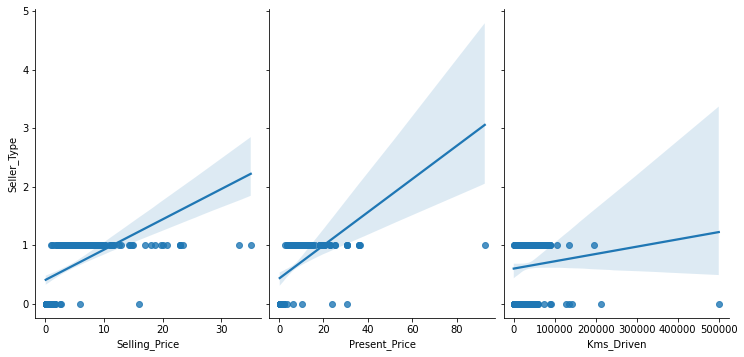

In [39]:
sns.pairplot(data, x_vars=['Selling_Price', 'Present_Price','Kms_Driven'], y_vars='Seller_Type', height=5, aspect=0.7, kind='reg')

In [40]:
y = data['Fuel_Type']
print(y.shape)

y = data['Fuel_Type'].values.reshape(-1, 1)
print(y.shape)


(301,)
(301, 1)


In [41]:
y = data['Transmission']
print(y.shape)

y = data['Transmission'].values.reshape(-1, 1)
print(y.shape)


(301,)
(301, 1)


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)


In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
predict = reg.predict(x_test)
print(f"The various coefficients of the model are :- {reg.coef_}")
print(f"The intercept of the model are :- {reg.intercept_}")
print(
    f"The equation of the model is :- {reg.coef_[0][0]:.3}*y1 + {reg.coef_[0][1]:.3}*y2 + {reg.coef_[0][2]:.3}*y3 + {reg.intercept_[0]:.3}")


The various coefficients of the model are :- [[ 0.11543893 -0.01694311  0.06001173]]
The intercept of the model are :- [0.12154029]
The equation of the model is :- 0.115*y1 + -0.0169*y2 + 0.06*y3 + 0.122


In [44]:
from sklearn.metrics import mean_absolute_error, mean_absolute_error

mae = mean_absolute_error(y_test, predict)
print(f"The mean square error of the model is :- {mae:.3}")
rmse = np.sqrt(mae)
print(f"The Root mean square error of the model is :- {rmse:.3}")
mae = mean_absolute_error(y_test, predict)
print(f"The Mean Absolute Error of the model is:- {mae:.3f} ")


The mean square error of the model is :- 0.219
The Root mean square error of the model is :- 0.468
The Mean Absolute Error of the model is:- 0.219 


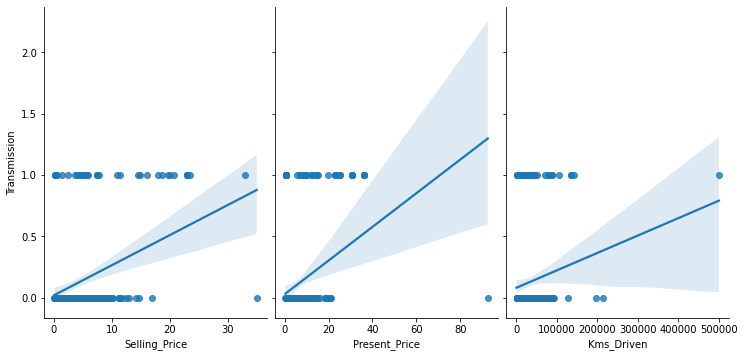

In [45]:
sns.pairplot(data, x_vars=['Selling_Price', 'Present_Price','Kms_Driven'], y_vars='Transmission', height=5, aspect=0.7, kind='reg')